In [1]:
 # -*- coding: utf-8 -*-
from math import cos, sin, sqrt, pi, radians, degrees, atan
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Constants
g = 9.81
v = 3.5

In [72]:
# Simple model, max at pi / 4
x = lambda v, t, theta: v * t * cos(theta)
y = lambda v, t, theta: v * t * sin(theta) - (g / 2) * t**2

# Range of a projectile launched from a level surface
L = lambda v, theta: (v**2 * sin(2*theta)) / g

# Maximum range for an elevated launch
R_max = lambda v, h: sqrt((v**2/g) + 2 * (v**2/g) * h)

# This maximum range is achieved using the launch angle
optimal_angle = lambda v, h: atan(1 / (sqrt(1 + (2*h) / (v**2/g))))

def display_2d_plot(x, plots, labels, lims=None, grid=True, img=None, loc=1, title=None):
    for y, sym, lbl in plots:
        if lbl:
            plt.plot(x, y, sym, label=lbl)
        else:
            plt.plot(x, y, sym)

    plt.xlabel(labels['xlabel'])
    plt.ylabel(labels['ylabel'])
    plt.grid(grid)
    plt.legend(loc=loc)
    
    if title:
        plt.title(title, loc='left')

    if lims:
        plt.xlim(lims['xlim'])
        plt.ylim(lims['ylim'])
        
    if img: plt.savefig(img, dpi=300)
    plt.show()
    
    
def display_3d_line_plot(plots, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for xs, ys, zs in plots:
        ax.scatter(xs, ys, zs, zdir='z', c='g')
    ax.set_xlabel(labels['xlabel'])
    ax.set_ylabel(labels['ylabel'])
    ax.set_zlabel(labels['zlabel'])
    ax.view_init(elev=20, azim=45)
    ax.dist = 11
    plt.show()
    
    
def display_3d_gca_plot(x, y, z, labels):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, cmap=cm.PuBuGn)
    ax.set_xlabel(labels['xlabel'])
    ax.set_ylabel(labels['ylabel'])
    ax.set_zlabel(labels['zlabel'])
    plt.show()

/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


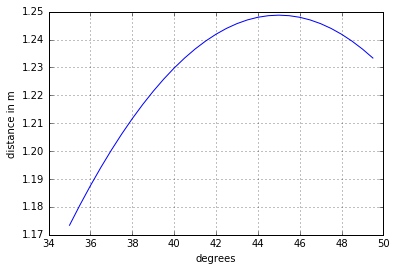

In [9]:
degs = np.arange(35, 50, 0.5)
distances = [L(v, radians(d)) for d in degs]
labels = {'xlabel': 'degrees', 'ylabel': 'distance in m'}
lims = {'xlim': [34, 51], 'ylim': [3, 3.5]}
display_2d_plot(degs, [(distances, '', '')], labels, lims=None)

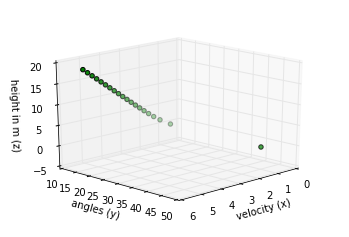

In [10]:
velocities = np.arange(1, 6, 0.25)
heights = np.arange(0, 20, 1)
angles = [degrees(optimal_angle(v, h))
          for v, h in zip(velocities, heights)]
labels = {'xlabel': 'velocity (x)',
          'ylabel': 'angles (y)',
          'zlabel': 'height in m (z)'
         }

x, y = np.meshgrid(velocities, heights)
plots = [(velocities, angles, heights)]
display_3d_line_plot(plots, labels)

# x, y = np.meshgrid(angles, velocities)
# z = heights
# display_3d_gca_plot(x, y, z, labels)

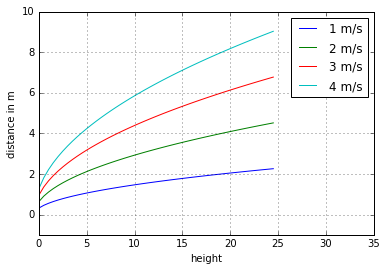

In [13]:
heights = np.arange(0, 25, 0.5)
labels = {'xlabel': 'height', 'ylabel': 'distance in m'}

plots = []

for vel in np.arange(1, 5, 1):
    distance = [R_max(vel, h) for h in heights]
    plots.append((distance, '', '{} m/s'.format(vel)))

lims = {'xlim': [0, 35], 'ylim': [-1, 10]}
display_2d_plot(heights, plots, labels, lims, loc=1)

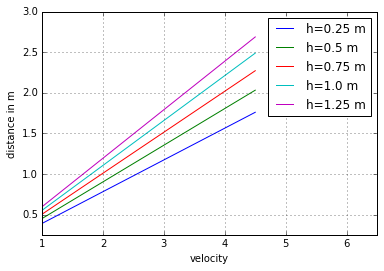

In [14]:
velocities = np.arange(1, 5, 0.5)
labels = {'xlabel': 'velocity', 'ylabel': 'distance in m'}

plots = []

for h in np.arange(0.25, 1.5, 0.25):
    distance = [R_max(vel, h) for vel in velocities]
    plots.append((distance, '', 'h={} m'.format(h)))

lims = {'xlim': [1, 6.5], 'ylim': [0.25, 3]}
display_2d_plot(velocities, plots, labels, lims)

In [15]:
# More realistic model

# Constants
r = 1 # length of rope
g = 9.81
h = 0.5 # nadir point
alpha = 90 # start angle

In [16]:
# th - theta s, release angle
# v - velocity at release time
x = lambda th, v, t: r*sin(th) + v*t*cos(th) # eqn. (1)
y = lambda th, v, t: h + r - r*cos(th) + v*t*sin(th) - (g/2)*t**2 # eqn. (2)

# At t = t_f the object is on the ground and x(t_f) = L and
# y(t_f) = 0. Substituting these into the equations for x and y gives:
# L = r*sin(theta_s) + v_s*t_f*cos(theta_s)
# 0 = h + r(1 - cos(theta_s)) + v_s*t_f*sin(theta_s) - (g/2)*t_f**2
# Expression for flight distance L with time elimiinated

def flight_distance(theta, v, h):
    return (
        r * sin(theta) + (v**2*sin(theta)*cos(theta)) / g +
        sqrt(((v**2*sin(theta)*cos(theta)) / g)**2 +
             ((2*v**2*cos(theta)*cos(theta)*(h + r - r*cos(theta))) / g)))


def flight_distance2(th, v, h):
    return (
        r * sin(th) + (v**2*sin(th)*cos(th)) / g + 
        (v*cos(th)*sqrt(v**2*sin(th)*sin(th) + 2*g*(h + r*(1 - cos(th))))) / g)

In [18]:
results = []

for theta in np.arange(0, 50, 0.5):
    for v in np.arange(0.25, 9, 0.25):
        for h in np.arange(0.1, 1, 0.1):
            L = flight_distance(radians(theta), v, h)
            if not results or results[3] < L:
                results = [theta, v, h, L]
                
print("Degrees: {}\nVelocity: {}\nHeight: {}\nDistance: {}".format(*results))

Degrees: 44.0
Velocity: 8.75
Height: 0.9
Distance: 9.569007687871899


In [19]:
# The launch velocity v_s is dependent on theta_s because of
# the law of conservation of energy
# mh[h + r(1 - cos(alpha))] = mg[h + r(1 - cos(theta))] + (m /2)*v**2
# or the simpler expression
# v**2 / g = 2r(cos(theta) - cos(alpha))

# Expression for flight distance as a function of:
# rope length, release angle, height of swing (nadir point),
# starting angle
def flight_dist_complete(r, th, alph, h):
    delta_1 = h / r + (1 - cos(th))
    delta_2 = cos(th) - cos(alph)
    result = (
        sin(th) + delta_2*sin(2*th) + 
        2*cos(th)*sqrt(delta_2*(delta_2*sin(th)*sin(th) + delta_1)))
    return result * r

In [185]:
results = []

for l in np.arange(0.5, 3, 0.5):
    for theta in np.arange(15, 45, 0.5):
        for alpha in np.arange(60, 181, 0.5):
            for h in np.arange(0.1, 0.6, 0.1):
                result = flight_dist_complete(l, radians(theta), radians(alpha), h)
                if not results or results[4] < result:
                    results = (r, theta, alpha, h, result)

print("Rope length: {}".format(results[0]))
print("Release angle: {}".format(results[1]))
print("Start angle: {}".format(results[2]))
print("Height (nadir point): {}".format(results[3]))
print("Distance: {}".format(results[4]))

Rope length: 1
Release angle: 41.5
Start angle: 180.0
Height (nadir point): 0.5
Distance: 11.464096631245129


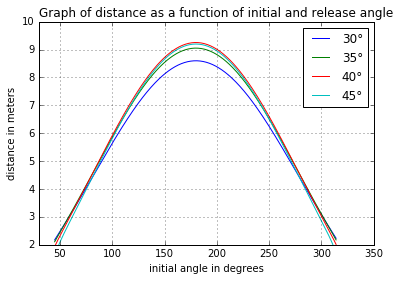

In [180]:
# Searching for optimal initial and release angles
h = 0.5
l = 2.0

alphas = np.arange(45, 315, 1)
thetas = np.arange(30, 50, 5)
labels = {'xlabel': 'initial angle in degrees', 'ylabel': 'distance in meters'}
plots = []

for theta in thetas:
    distance = []
    for alpha in alphas:
        distance.append(
            flight_dist_complete(l, radians(theta), radians(alpha), h))
    plots.append((distance, '','{}°'.format(theta) ))

lims = {'xlim': [30, 350], 'ylim': [2, 10]}
img='alpha_vs_theta.png'
display_2d_plot(
    alphas, plots, labels, loc=1, img=img, lims=lims,
    title="Graph of distance as a function of initial and release angle")


/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


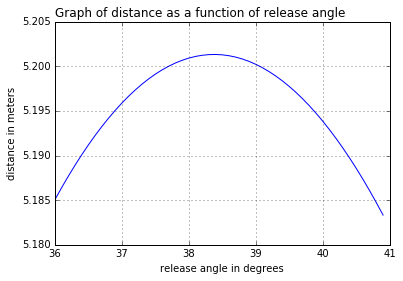

In [198]:
# Fixed optimal initial angle
h = 0.5
l = 2.0
alpha = 90

thetas = np.arange(36, 41, 0.1)
plots = []

labels = {'xlabel': 'release angle in degrees', 'ylabel': 'distance in meters'}
    
result = [
    flight_dist_complete(l, radians(theta), radians(alpha), h)
    for theta in thetas
]

plots = [(result, '', '')]

lims = {'xlim': [30, 350], 'ylim': [2, 10]}
img='optimal_theta_zoomed_in_90starting.png'
display_2d_plot(
    thetas, plots, labels, loc=1, img=img,
    title="Graph of distance as a function of release angle")


In [203]:
# Total height 2.5 meters, recommended safety surfacing 2.5 * 2

print(flight_dist_complete(2, radians(41.4), radians(90), 0.5))
print(flight_dist_complete(3, radians(41.4), radians(90), 1))
print(flight_dist_complete(4, radians(41.4), radians(90), 0.5))

5.175558760936619
7.937555848281974
9.979525540794423
